# **Visualización de Campos Vectoriales**

Erick Becerra Marín <br>
Daniel López López 

---
---

### **Bibliotecas, Funciones y Parámetros**

In [1]:
import numpy as np
import sympy as sp
from sympy.abc import x, y
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

%matplotlib inline

plt.rcParams['figure.figsize'] = [11, 7]  # Aumenta el tamaño de las figuras.
plt.rcParams['figure.dpi'] = 100

def floats(str):
    return list(map(float, str.split()))

def apply_transformation(vec, matrx):
    v = matrx.dot(vec)
    return v[0], v[1]


---

### **Definición del Campo**

Aquí puedes ingresar el campo vectorial y modificar los intervalos en los que se graficarán los resultados. 
***Nota***. Para cualquier función que necesites en la definición del campo ($\cos x$, $\sqrt{x}$, etc.), utiliza la versión de la biblioteca `SymPy`. Para ello escribe `sp.tu_función()`. 

In [19]:
vx = sp.cos(x)       # Definición del campo en X            
vy = sp.sin(y)       # Definición del campo en Y


# Intervalo del campo vectorial. El tercer número corresponde al número de valores generados entre los 
# límites del intervalo.
    
X, Y = np.meshgrid(np.linspace(-10, 10, 20),              # Intervalo del campo vectorial
                   np.linspace(-10, 10, 20))

# Intervalo de la divergencia. Se recomienda dejar los límites iguales e ingresar una cantidad de 
# puntos mucho mayor, esto para obtener un mapa de color nítido.

X_div, Y_div = np.meshgrid(np.linspace(-10, 10, 1000),     
                           np.linspace(-10, 10, 1000))    

# Intervalo de las derivadas parciales

dom = np.linspace(-10, 10, 200)

### **Seleccionar Transformación**

Aquí puedes seleccionar la transformación que deseas aplicar. También puedes especificar un factor de expansión `k` para alargar o acortar los vectores al aplicar la transformacione; si no deseas alterar la escala, introduce `k = 1`.

- Si es una rotación, corre la primera celda tras ingresar el ángulo de rotación en radianes. U(tiliza la clase `pi` del módulo `SymPy` en tu ángulo; para ello escribe `sp.pi`).
- Si es una reflexión, corre la segunda celda tras ingresar el valor de la pendiente de la recta $y=mx$
- Si quieres usar otra matriz, corre la tercera celda tras ingresar tus valores directamente en el `np.array()`.

In [3]:
ang = sp.pi / 2         # Ángulo de rotación en radianes
k = 0.25                  # Factor de expansión
    
matrx = np.array([[k*sp.cos(ang), -k*sp.sin(ang)],
                  [k*sp.sin(ang), k*sp.cos(ang)]])

In [ ]:
# Reflexión

m = 1                   # Pendiente de la recta            
k = 1                   # Factor de expansión

ang = sp.atan(m)
    
matrx = np.array([[k*sp.cos(2*ang), k*sp.sin(2*ang)],
                  [k*sp.sin(2*ang), -k*sp.cos(2*ang)]])

In [44]:
# Otra

matrx = np.array([[42, 2.716544],       # Ingresa tus valores
                  [-3.141592, 7]])

---

### **Cálculo de Resultados**

In [22]:
# Campos Vectoriales

field = np.array([vx, vy])

# Funciones para evaluar el campo original
fx = sp.lambdify([x, y], vx, 'numpy')
fy = sp.lambdify([x, y], vy, 'numpy')

# Funciones para evaluar el campo transformado
vx_t, vy_t = apply_transformation(field, matrx)
field_t = [vx_t, vy_t]
fx_t = sp.lambdify([x, y], vx_t, 'numpy')
fy_t = sp.lambdify([x, y], vy_t, 'numpy')

VX = fx(X, Y)       # Campo original en x
VY = fy(X, Y)       # Campo original en y
U = fx_t(X, Y)      # Campo transformado en x
V = fy_t(X, Y)      # Campo transformado en y

##################################################################

# Derivadas parciales
dx = sp.diff(vx, x)              # Forma simbólica
dy = sp.diff(vy, y)
dx_t = sp.diff(vx_t, x)
dy_t = sp.diff(vy_t, y)

eval_dx = sp.lambdify([x, y], dx, 'numpy')
eval_dy = sp.lambdify([x, y], dy, 'numpy')
eval_dx_t = sp.lambdify([x, y], dx_t, 'numpy')
eval_dy_t = sp.lambdify([x, y], dy_t, 'numpy')

DX = eval_dx(dom, 1) if dx != 0 else dom*0               # y fija en 1
DY = eval_dy(1, dom) if dy != 0 else dom*0               # x fija en 1
DX_t = eval_dx_t(dom, 1) if dx_t != 0 else dom*0         # y fija en 1
DY_t = eval_dy_t(1, dom) if dy_t != 0 else dom*0         # x fija en 1


# Divergencia
div = dx + dy
div_t = dx_t + dy_t

eval_div = sp.lambdify([x, y], div, 'numpy')
eval_div_t = sp.lambdify([x, y], div_t, 'numpy')

Z = eval_div(X_div, Y_div) if div != 0 else X*0
Z_t = eval_div_t(X_div, Y_div) if div_t != 0 else X_div*0

print(f"""
Campo transformado F_t(x, y) = {field_t}
Divergencia original ∇⋅F = {div}
Nueva divergencia ∇⋅F_t = {div_t}

Derivadas parciales originales:
∂F_x / ∂x = {dx}
∂F_y / ∂y = {dy}

Nuevas derivadas parciales:
∂F_tx / ∂x = {dx_t}
∂F_ty / ∂y = {dy_t}
""")


Campo transformado F_t(x, y) = [-0.25*sin(y), 0.25*cos(x)]
Divergencia original ∇⋅F = -sin(x) + cos(y)
Nueva divergencia ∇⋅F_t = 0

Derivadas parciales originales:
∂F_x / ∂x = -sin(x)
∂F_y / ∂y = cos(y)

Nuevas derivadas parciales:
∂F_tx / ∂x = 0
∂F_ty / ∂y = 0



---

### **Graficación de Valores Obtenidos**

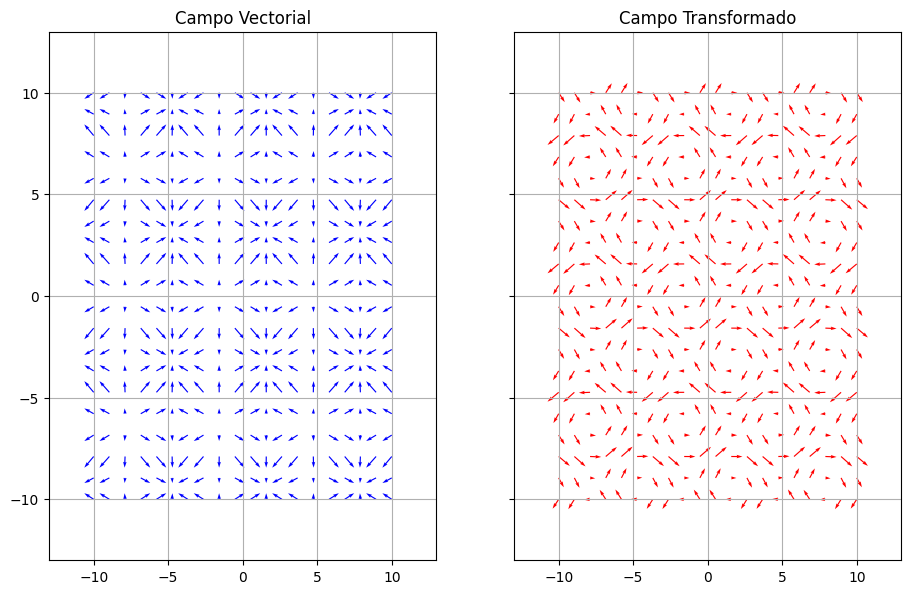

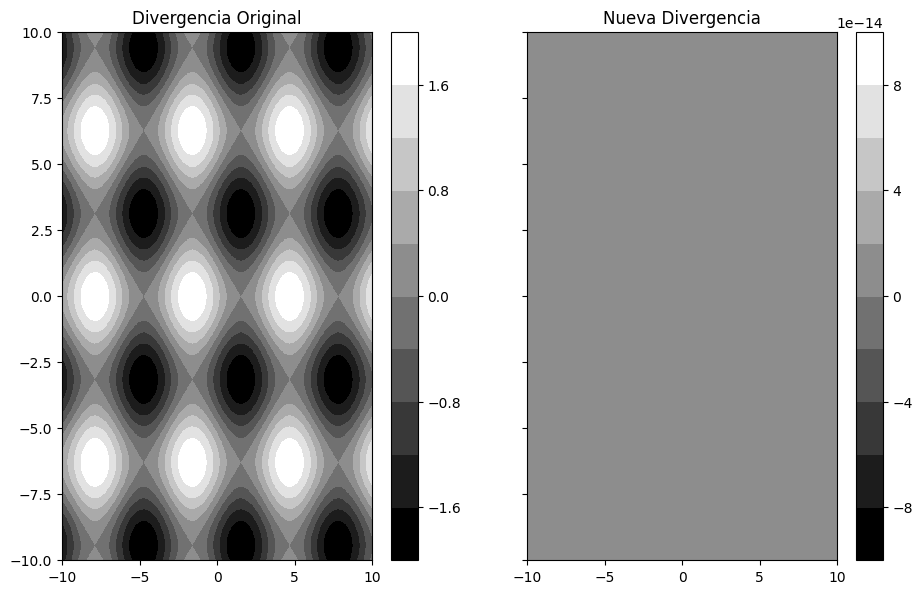

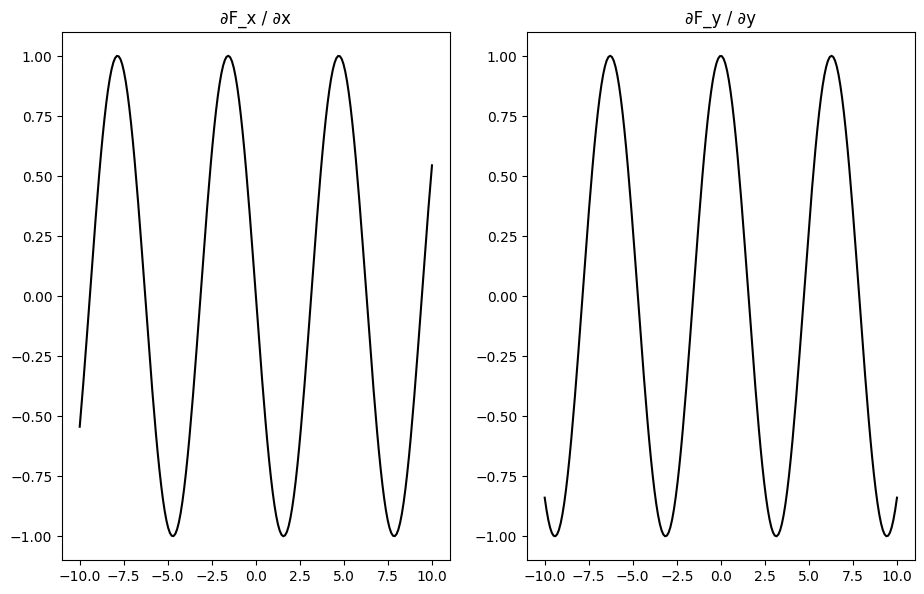

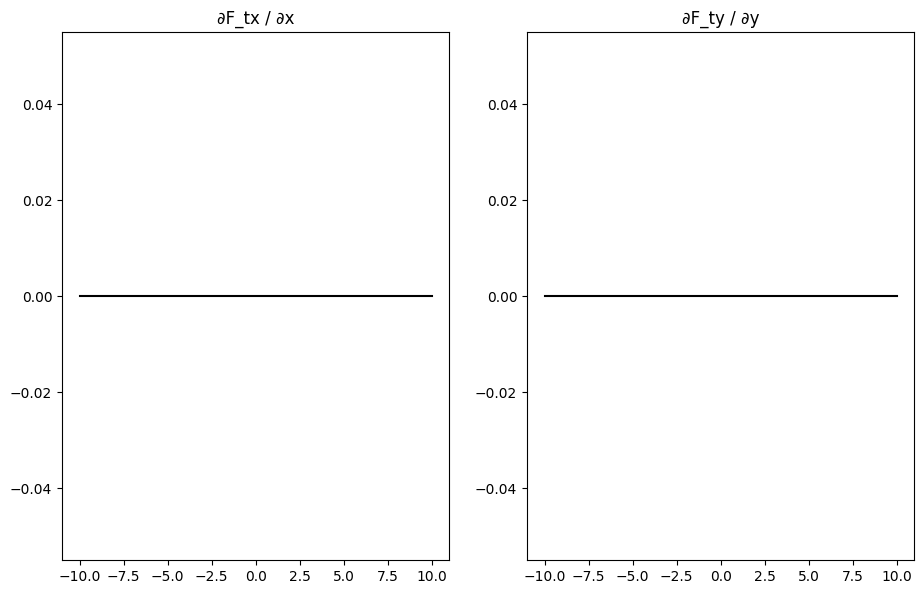

In [23]:
fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
fig2, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, sharey=True)
fig3, (ax5, ax6) = plt.subplots(nrows=1, ncols=2)
fig4, (ax7, ax8) = plt.subplots(nrows=1, ncols=2)

# Campos Vectoriales

ax1.quiver(X, Y, VX, VY, color='b')
ax1.set_title('Campo Vectorial')

ax1.set_xlim(-13, 13)
ax1.set_ylim(-13, 13)
ax1.grid()

ax2.quiver(X, Y, U, V, color='r')
ax2.set_title('Campo Transformado')

ax2.set_xlim(-13, 13)
ax2.set_ylim(-13, 13)
ax2.grid()

# Divergencia

levels = MaxNLocator(nbins=10).tick_values(Z.min(), Z.max())
levels_t = MaxNLocator(nbins=10).tick_values(Z_t.min(), Z_t.max())

norm = BoundaryNorm(levels, ncolors=cm.gray.N, clip=True)
norm_t = BoundaryNorm(levels_t, ncolors=cm.gray.N, clip=True)

div = ax3.pcolormesh(X_div, Y_div, Z, cmap = cm.gray, shading='auto', norm=norm)
ax3.set_title('Divergencia Original')

div_t = ax4.pcolormesh(X_div, Y_div, Z_t, cmap = cm.gray, shading='auto', norm=norm_t)
ax4.set_title('Nueva Divergencia')

fig2.colorbar(div, ax=ax3)
fig2.colorbar(div_t, ax=ax4)

# Derivadas parciales
ax5.plot(dom, DX, color='black')
ax5.set_title('∂F_x / ∂x')

ax6.plot(dom, DY, color='black')
ax6.set_title('∂F_y / ∂y')

ax7.plot(dom, DX_t, color='black')
ax7.set_title('∂F_tx / ∂x')

ax8.plot(dom, DY_t, color='black')
ax8.set_title('∂F_ty / ∂y')

plt.show()